In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [66]:
df = pd.read_csv("C:/Users/GOUREESH/Desktop/DataScience and Machine learning/LinearRegression/data/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [67]:
#to summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [68]:
#Selecting only necessary features
cdf = df[['ENGINESIZE' , 'CYLINDERS' , 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9) #displaying initial 9 data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


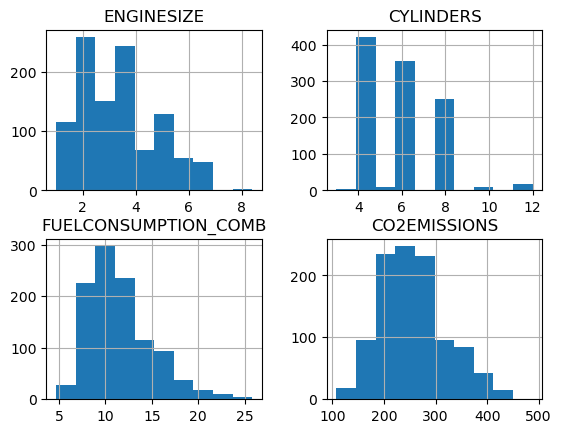

In [69]:
vis = cdf[['ENGINESIZE' , 'CYLINDERS' , 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
vis.hist() # to diplay histogram of the data for proper visualising
plt.show()

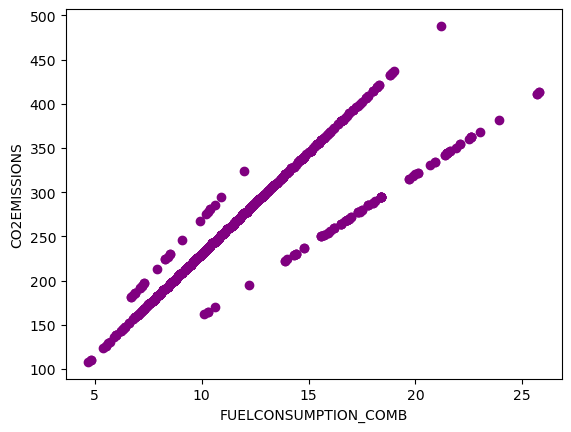

In [70]:
plt.scatter(cdf.FUELCONSUMPTION_COMB , cdf.CO2EMISSIONS, color='purple')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

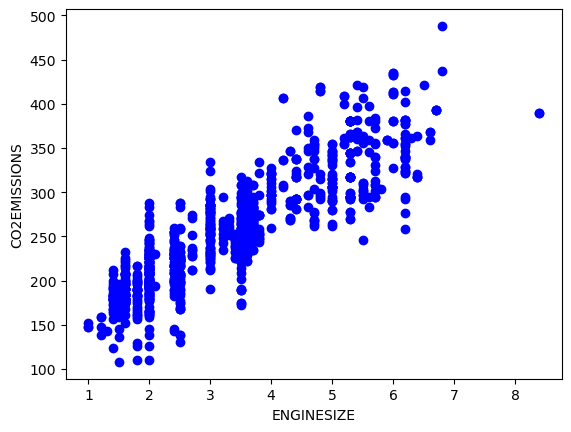

In [71]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

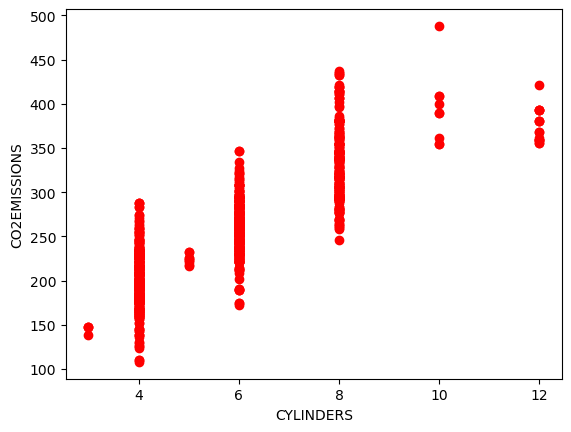

In [72]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='red')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

## Creating a Train/Test split

In [73]:
# creeating an 80% train and 20% test dataset
msk = np.random.rand(len(df)) < 0.8 
train = cdf[msk] # selecting 80%
test = cdf[~msk] # selecting 20%

#### We will be using Engine Size and CO2 emission for the model


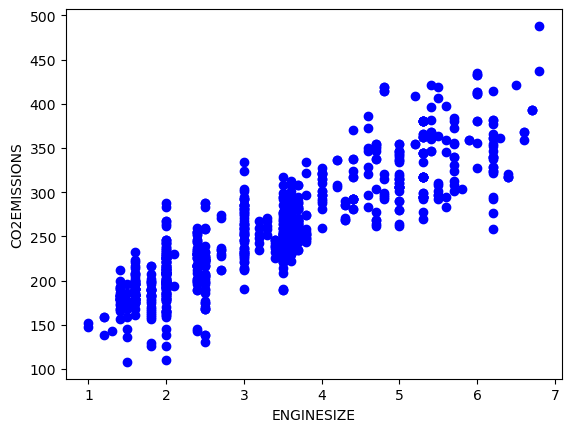

In [74]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [75]:
# We will be using sklearn to model data
from sklearn import linear_model
regr = linear_model.LinearRegression() # linear regression model
train_X = np.asanyarray(train[['ENGINESIZE']])
train_Y = np.asanyarray(train[['CO2EMISSIONS']]) # np.asanyaaray converts array to ndarray
regr.fit(train_X , train_Y)
print(f'coefficient: {regr.coef_}, intercept: {regr.intercept_}')

coefficient: [[39.73118922]], intercept: [123.30660937]


Text(0, 0.5, 'Emission')

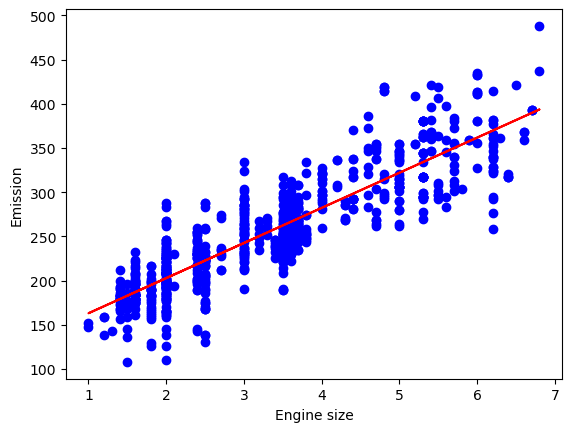

In [76]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_X, regr.coef_[0][0]*train_X + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation


In [77]:
from sklearn.metrics import r2_score

test_X = np.asanyarray(test[['ENGINESIZE']])
test_Y = np.asanyarray(test[['CO2EMISSIONS']])
test_Y_ = regr.predict(test_X)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_Y_ - test_Y))) # shows the mean absolute error
print("Residual sum of squares (MSE): %.2f" % np.mean((test_Y_ - test_Y) ** 2)) # shows mean squared error
print("R2-score: %.2f" % r2_score(test_Y, test_Y_) ) # statistical measure of how close the data are to the fitted regression line and higher the value the better model



Mean absolute error: 25.21
Residual sum of squares (MSE): 1090.02
R2-score: 0.73


## Other Cases


#### Using FUELCOMSUMPTION_COMB and CO2EMISSIONS

In [78]:
train_X = train[['FUELCONSUMPTION_COMB']]
test_X = test[['FUELCONSUMPTION_COMB']]

regr.fit(train_X, train_Y) # train_y created previosly
print(f'coefficient: {regr.coef_}, intercept: {regr.intercept_}')

coefficient: [[16.18819801]], intercept: [68.61115544]


Text(0, 0.5, 'Emission')

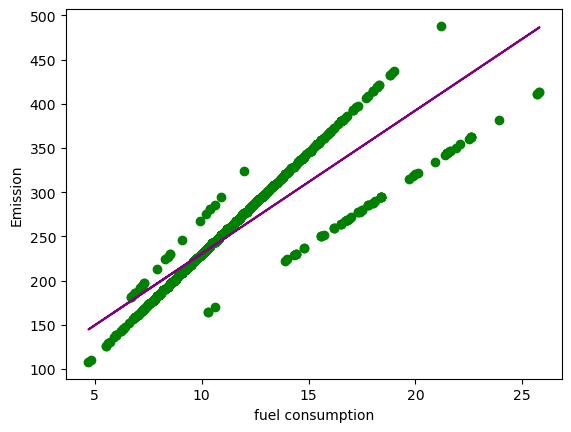

In [79]:
#plotting the values
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='green')
plt.plot(train_X, regr.coef_[0][0]*train_X + regr.intercept_[0], 'purple')
plt.xlabel("fuel consumption")
plt.ylabel("Emission")

In [80]:
# prediction
predictions = regr.predict(test_X)

In [81]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_Y))) #finding error

Mean Absolute Error: 21.39
